In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving powergrid.csv to powergrid.csv


In [ ]:
df = pd.read_csv("powergrid.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/16/2010,72.53,72.56,71.51,72.08,52.01,7588174
1,12/20/2010,71.81,72.83,71.63,71.89,51.87,9088413
2,12/21/2010,72.00,73.58,71.93,72.86,52.57,10270046
3,12/22/2010,73.05,73.73,72.86,73.46,53.01,8699161
4,12/23/2010,73.16,73.58,72.83,72.94,52.63,3458744
5,12/24/2010,72.38,73.50,72.38,73.31,52.90,3507492
6,12/27/2010,73.13,73.35,72.26,72.53,52.33,4131588
7,12/28/2010,72.38,72.71,71.93,72.11,52.03,4553909
8,12/29/2010,72.04,72.38,71.63,71.78,51.79,7736218
9,12/30/2010,71.78,73.16,70.99,72.45,52.28,23960999


In [ ]:
df.shape

(2710, 7)

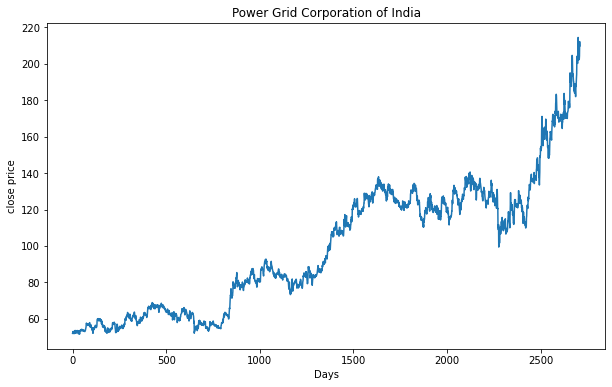

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Power Grid Corporation of India")
plt.xlabel("Days")
plt.ylabel("close price")
plt.plot(df['Adj Close'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2032, 678)

In [ ]:
train_data

array([[0.00233315],
       [0.00147357],
       [0.00577147],
       ...,
       [0.4451403 ],
       [0.43979861],
       [0.46257752]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)



In [ ]:
print(X_train.shape), print(y_train.shape)

(1931, 100)
(1931,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(577, 100)
(577,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 17s 234ms/step - loss: 0.0122 - val_loss: 0.0061
Epoch 2/100
31/31 [==============================] - 6s 190ms/step - loss: 5.6699e-04 - val_loss: 0.0048
Epoch 3/100
31/31 [==============================] - 6s 195ms/step - loss: 3.9625e-04 - val_loss: 0.0028
Epoch 4/100
31/31 [==============================] - 12s 394ms/step - loss: 3.3887e-04 - val_loss: 0.0031
Epoch 5/100
31/31 [==============================] - 11s 357ms/step - loss: 3.3293e-04 - val_loss: 0.0040
Epoch 6/100
31/31 [==============================] - 13s 430ms/step - loss: 3.3407e-04 - val_loss: 0.0033
Epoch 7/100
31/31 [==============================] - 10s 311ms/step - loss: 3.3454e-04 - val_loss: 0.0027
Epoch 8/100
31/31 [==============================] - 6s 188ms/step - loss: 3.1451e-04 - val_loss: 0.0029
Epoch 9/100
31/31 [==============================] - 6s 191ms/step - loss: 3.0420e-04 - val_loss: 0.0027
Epoch 10/100
31/31 [==============================] - 

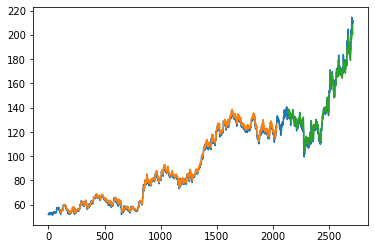

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

math.sqrt(mean_squared_error(ytest,test_predict))

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [ ]:
len(test_data)

678

In [ ]:
x_input=test_data[578:].reshape(1,-1)
x_input.shape




(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.74218702 0.73340701 0.72677596 0.74427457 0.74826549 0.75072143
 0.75194941 0.7752809  0.78479769 0.78080678 0.76975502 0.76300117
 0.76822005 0.77742985 0.76453613 0.76361515 0.81242709 0.8805796
 0.84895929 0.86093203 0.85970406 0.84926629 0.8348376  0.83913551
 0.83545159 0.87075582 0.87014183 0.90728802 0.93952232 0.93430343
 0.90268312 0.8762817  0.87443974 0.87689568 0.86584392 0.85202923
 0.85110825 0.82439983 0.81918094 0.83575858 0.82194388 0.81242709
 0.81918094 0.84435439 0.82839074 0.81519003 0.80137533 0.80045435
 0.83913551 0.8348376  0.85602014 0.86492294 0.87536072 0.92233069
 0.9312335  0.93706637 0.92325167 0.91250691 0.95241604 0.95517898
 1.         0.94842512 0.92325167 0.94658316 0.9404433  0.93061951
 0.92724259 0.93798735 0.9861853  0.97144962 0.94403332 0.92077017
 0.90344316 0.89153862 0.88232511 0.87349153 0.863729   0.85262579
 0.84031266 0.82713205 0.81342816 0.79945481 0.78536212 0.77122504
 0.75707805 0.74294633 0.72886199 0.71487194 0.7010

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

import matplotlib.pyplot as plt

len(df1)


2710

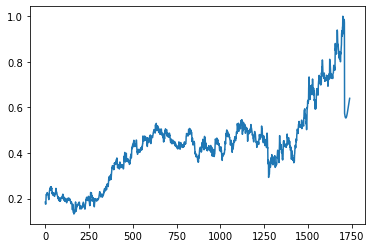

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])